In [2]:
import  requests
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
API_KEY = "D92WPGKN82A3O7DD"
symbol = 'AAPL'          


url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}&outputsize=compact'

response = requests.get(url)
data = response.json()

time_series = data.get('Time Series (Daily)', {})

df = pd.DataFrame.from_dict(time_series, orient='index')
df = df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})
df.index = pd.to_datetime(df.index)

In [18]:
df = df.sort_index()
df = df.astype(float)
print(df.head())

              Open      High     Low   Close      Volume
2025-03-12  220.14  221.7500  214.91  216.98  62547467.0
2025-03-13  215.95  216.8394  208.42  209.68  61368330.0
2025-03-14  211.25  213.9500  209.58  213.49  60107582.0
2025-03-17  213.31  215.2200  209.97  214.00  48073426.0
2025-03-18  214.16  215.1500  211.49  212.69  42432426.0


In [19]:
df.to_csv('stock_data.csv')                                 # to save data
print("Stock data saved as 'stock_data.csv'")


Stock data saved as 'stock_data.csv'


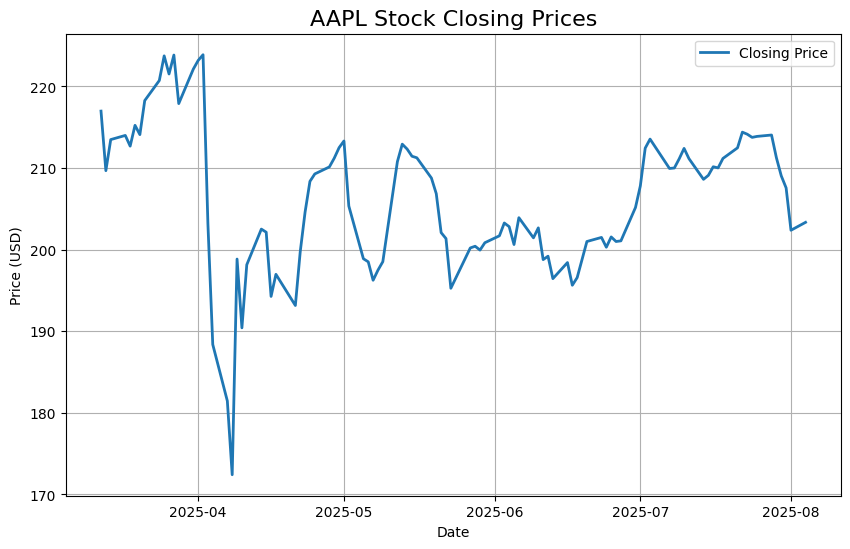

In [9]:
plt.figure(figsize=(10, 6))         # ploting  the 
plt.plot(df.index, df['Close'], label='Closing Price', linewidth=2)
plt.title(f'{symbol} Stock Closing Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()

plt.savefig('stock_price_chart.png')             #  saves the image
plt.show()                          